We simulate the quantum dynamics of Transverse Field Ising Model (TFIM) using Qiskit

In [18]:
import numpy as np
from qiskit.quantum_info import Operator, Pauli
from qiskit_dynamics import Solver, Signal
from qiskit.quantum_info.states import Statevector
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_bloch_vector
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
N = 10

x_ops = []
y_ops = []
z_ops = []
qubits = range(N)
zeros = Operator(np.zeros((2 ** N, 2 ** N)))

for i in qubits:
    X = zeros + Pauli('X')(i)
    x_ops.append(X)

    Y = zeros + Pauli('Y')(i)
    y_ops.append(Y)

    Z = zeros + Pauli('Z')(i)
    z_ops.append(Z)

In [20]:
J = 1
h_x = 0.5

H = zeros
for i in qubits:
    X = x_ops[i]
    H += h_x * (-X)

    if N > 1:
        j = i + 1 if i < (N - 1) else 0  # Nearest neighbors, with periodic boundary conditions
        op = zeros + Pauli('-ZZ')(i, j)
        H += J * op

solver = Solver(static_hamiltonian=H)

In [21]:
t_final = 20
tau = .05

vec = np.zeros(2**N)
vec[0] += 1
y0 = Statevector(vec)

n_steps = int(np.ceil(t_final / tau)) + 1
t_eval = np.linspace(0., t_final, n_steps)

sol = solver.solve(t_span=[0., t_final], y0=y0, t_eval=t_eval)

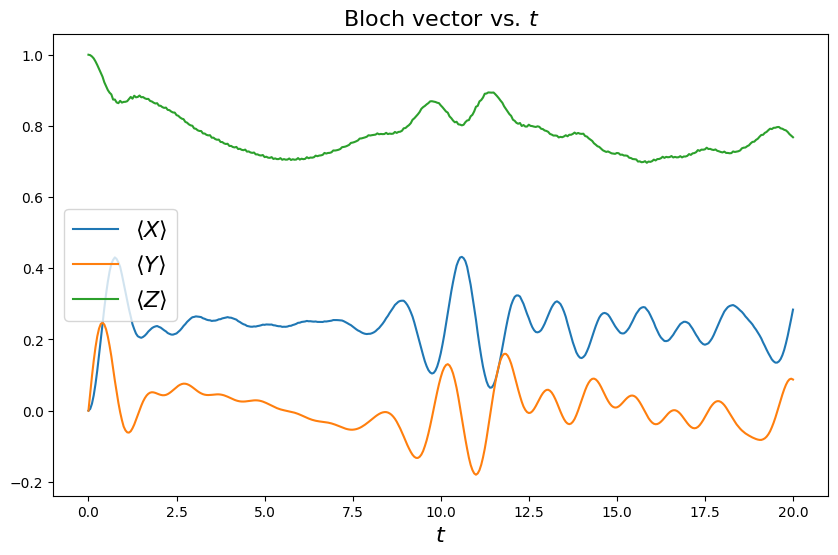

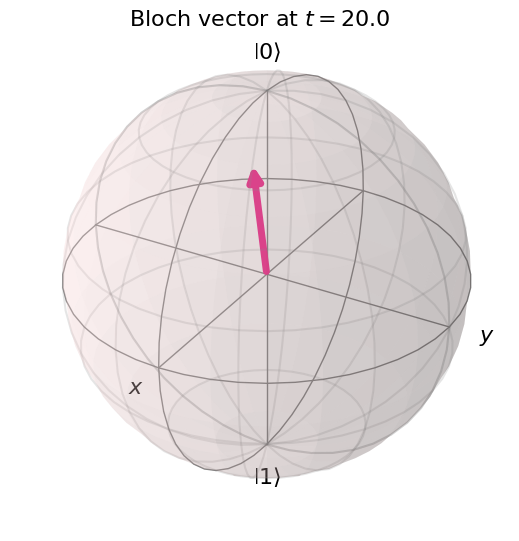

In [22]:
fontsize = 16

def plot_qubit_dynamics(sol, t_eval, X, Y, Z):
    n_times = len(sol.y)
    x_data = np.zeros((n_times,))
    y_data = np.zeros((n_times,))
    z_data = np.zeros((n_times,))

    for t_i, sol_t in enumerate(sol.y):
        x_data[t_i] = sol_t.expectation_value(X).real
        y_data[t_i] = sol_t.expectation_value(Y).real
        z_data[t_i] = sol_t.expectation_value(Z).real

    _, ax = plt.subplots(figsize = (10, 6))
    plt.rcParams.update({'font.size': fontsize})
    plt.plot(t_eval, x_data, label = '$\\langle X \\rangle$')
    plt.plot(t_eval, y_data, label = '$\\langle Y \\rangle$')
    plt.plot(t_eval, z_data, label = '$\\langle Z \\rangle$')
    plt.legend(fontsize = fontsize)
    ax.set_xlabel('$t$', fontsize = fontsize)
    ax.set_title('Bloch vector vs. $t$', fontsize = fontsize)
    plt.show()

    display(plot_bloch_vector([x_data[-1], y_data[-1], z_data[-1]],
                              f'Bloch vector at $t = {t_eval[-1]}$'))

plot_qubit_dynamics(sol, t_eval, X, Y, Z)